# Yuk diskusi bareng untuk menyelesaikan kasus berikut dengan AB testing

##**Case 1**

Sebuah e-commerce akan meluncurkan landing page baru, namun perlu diketahui apakah landing baru bisa meningkatkan conversion rate. Dengan mengerti nilai conversion rate tersebut, management e commerce dapat membuat kebijakan untuk tetap launching page baru atau tidak.

1. Lalukan import data yang sudah disediakan

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import random
import seaborn as sns
plt.style.use("fivethirtyeight")

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ab_data.csv to ab_data.csv


2. Lakukan managing data dengan python, mengubah kategori pada kolom converted menjadi: \
0 : Not converted \
1 : Converted

In [84]:
data = pd.read_csv("ab_data.csv", parse_dates=['timestamp'], index_col = 'user_id')
data

,timestamp,group,landing_page,converted
user_id,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0
804228,2017-01-12 08:01:45.159739,control,old_page,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0
864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...
751197,2017-01-03 22:28:38.630509,control,old_page,0
945152,2017-01-12 00:51:57.078372,control,old_page,0
734608,2017-01-22 11:45:03.439544,control,old_page,0


In [85]:
data['converted']=data.converted.replace(to_replace={0:"Not Converted",1:"Converted"})
data

,timestamp,group,landing_page,converted
user_id,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,Not Converted
804228,2017-01-12 08:01:45.159739,control,old_page,Not Converted
661590,2017-01-11 16:55:06.154213,treatment,new_page,Not Converted
853541,2017-01-08 18:28:03.143765,treatment,new_page,Not Converted
864975,2017-01-21 01:52:26.210827,control,old_page,Converted
...,...,...,...,...
751197,2017-01-03 22:28:38.630509,control,old_page,Not Converted
945152,2017-01-12 00:51:57.078372,control,old_page,Not Converted
734608,2017-01-22 11:45:03.439544,control,old_page,Not Converted


3. Lakukan eksplorasi data, dengan melihat apakah ada yang missing, dan buatlah boxplot untuk melakukan perbandingan?

- melakukan eksplorasi data

In [86]:
# menampilkan informasi tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294478 entries, 851104 to 715931
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   timestamp     294478 non-null  datetime64[ns]
 1   group         294478 non-null  object        
 2   landing_page  294478 non-null  object        
 3   converted     294478 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 11.2+ MB


In [87]:
# menampilkan jumlah nilai yang hilang pada setiap kolom
data.isna().sum()

timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [88]:
# menampilkan statistik deskriptif dari setiap kolom
data.describe()

<ipython-input-88-4a16d2138b88>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,timestamp,group,landing_page,converted
count,294478,294478,294478,294478
unique,294478,2,2,2
top,2017-01-21 22:11:48.556739,treatment,old_page,Not Converted
freq,1,147276,147239,259241
first,2017-01-02 13:42:05.378582,NaN,NaN,NaN
last,2017-01-24 13:41:54.460509,NaN,NaN,NaN


- membuat boxplot

In [89]:
data['timestamp']=pd.to_datetime(data['timestamp']).dt.hour

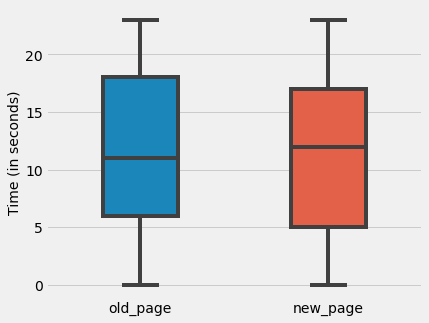

In [90]:
data["landing_page"] = data["landing_page"].apply(lambda x: str(x))
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.boxplot(x=data["landing_page"], y=data["timestamp"], width=0.4)
ax.set_ylabel('Time (in seconds)', size=14)
ax.set_xlabel("")
ax.tick_params(labelsize=14)
plt.savefig('avg_time_spend.png')
plt.show()

1. median oldpage lebih rendah dibandingkan new page
2. lebar boxplot oldpage lebih tinggi atau bervariasi

4. Buatlah tabel contingency dan hitunglah conversion rate? Analisislah

- Contingency Table

In [64]:
# membuat tabel kontingensi
contingency_table = pd.crosstab(data["landing_page"], data["converted"])

# menampilkan tabel kontingensi
print(contingency_table)

converted     Converted  Not Converted
landing_page                          
new_page          17498         129741
old_page          17739         129500


- Conversion Rate

In [94]:
# Buat data frame tabel kontingensi
data1 = pd.DataFrame({
    'landing_page': ['new_page', 'old_page'],
    'Converted': [17498, 17739],
    'Not Converted': [129741, 129500]
})

# Hitung conversion rate
data1['Conversion Rate'] = data1['Converted'] / (data1['Converted'] + data1['Not Converted'])

# Print hasil
print(data1)

  landing_page  Converted  Not Converted  Conversion Rate
0     new_page      17498         129741         0.118841
1     old_page      17739         129500         0.120478


5. Buatlah uji statistik yang sesuai untuk mengetahui perbedaan dari landing page tersebut

In [95]:
alpha = 0.05
test_res = stats.ttest_ind(data[data.landing_page ==  "old_page"]["timestamp"], 
                      data[data.landing_page == "new_page"]["timestamp"],
                      equal_var=False)
print(f'p-value for single sided test: {test_res.pvalue / 2:.4f}')
if test_res.pvalue <= alpha:
    print('Reject null hypothesis)')
else:
    print('Do not reject null hypothesis')

p-value for single sided test: 0.3159
Do not reject null hypothesis


nilai p-value 0.3159 lebih besar dari 0.05 sehingga H0 tidak ditolak, maka dapat disimpulkan bahwa tidak ada perbedaan yang signifikan waktu yang dihabiskan pengguna ketika mengakses old page maupun new page.